In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.5376, 0.3086]) 
label: tensor([4.2401])


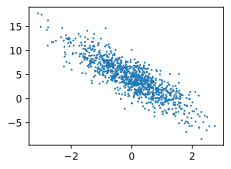

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.4444, -0.1272],
        [-0.5024, -1.2332],
        [-1.0337,  0.2618],
        [-0.5460,  0.7154],
        [ 0.4293,  0.1320],
        [-0.7747, -0.1549],
        [-0.2048, -1.2175],
        [-0.9281,  0.2749],
        [ 1.1610, -0.0615],
        [ 2.0316, -0.8382]]) 
 tensor([[ 1.7400],
        [ 7.3806],
        [ 1.2612],
        [ 0.6768],
        [ 4.6079],
        [ 3.1772],
        [ 7.9258],
        [ 1.3903],
        [ 6.7380],
        [11.1238]])


In [7]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [8]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [9]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [ ]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [14]:
lr = 0.001
num_epochs = 100
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000051
epoch 2, loss 0.000051
epoch 3, loss 0.000051
epoch 4, loss 0.000051
epoch 5, loss 0.000051
epoch 6, loss 0.000051
epoch 7, loss 0.000051
epoch 8, loss 0.000051
epoch 9, loss 0.000051
epoch 10, loss 0.000051
epoch 11, loss 0.000051
epoch 12, loss 0.000051
epoch 13, loss 0.000051
epoch 14, loss 0.000051
epoch 15, loss 0.000051
epoch 16, loss 0.000051
epoch 17, loss 0.000051
epoch 18, loss 0.000051
epoch 19, loss 0.000051
epoch 20, loss 0.000051
epoch 21, loss 0.000051
epoch 22, loss 0.000051
epoch 23, loss 0.000051
epoch 24, loss 0.000051
epoch 25, loss 0.000051
epoch 26, loss 0.000051
epoch 27, loss 0.000051
epoch 28, loss 0.000051
epoch 29, loss 0.000051
epoch 30, loss 0.000051
epoch 31, loss 0.000051
epoch 32, loss 0.000051
epoch 33, loss 0.000051
epoch 34, loss 0.000051
epoch 35, loss 0.000051
epoch 36, loss 0.000051
epoch 37, loss 0.000051
epoch 38, loss 0.000051
epoch 39, loss 0.000051
epoch 40, loss 0.000051
epoch 41, loss 0.000051
epoch 42, loss 0.000051
e

In [15]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-5.6028e-05,  3.8671e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0002], grad_fn=<RsubBackward1>)
